<a href="https://colab.research.google.com/github/sungrae98/Machine-Learning/blob/main/08_ML_TOP10_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler, MinMaxScaler #정규화


In [ ]:
%pwd
# present working directory (현재 작업 폴더)

'/content'

In [ ]:
# 경로 설정

path = '/content/drive/MyDrive/렛유인_머신러닝/pima-indians-diabetes3.csv'

In [ ]:
pd.read_csv(path)

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
raw = pd.read_csv(path)

df = raw.copy()

df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.columns

Index(['pregnant', 'plasma', 'pressure', 'thickness', 'insulin', 'bmi',
       'pedigree', 'age', 'diabetes'],
      dtype='object')

In [ ]:
df['plasma'][:5]

0    148
1     85
2    183
3     89
4    137
Name: plasma, dtype: int64

In [ ]:
# 독립변수(x), 종속변수(y) 구분

x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
print(x.columns)

Index(['pregnant', 'plasma', 'pressure', 'thickness', 'insulin', 'bmi',
       'pedigree', 'age'],
      dtype='object')


In [ ]:
print(x.shape)
print()
print(y.shape)

(768, 8)

(768,)


In [ ]:
# 정규화 (표준화)
sc = StandardScaler()
sc.fit_transform(x)

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
df[:5]

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.values

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [ ]:
pd.DataFrame(sc.fit_transform(x), columns = x.columns)

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [ ]:
scaled_x = pd.DataFrame(sc.fit_transform(x), columns = x.columns)

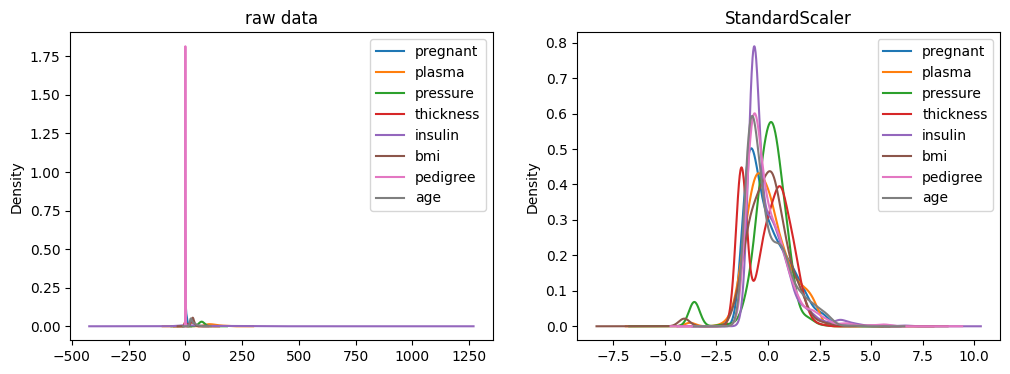

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4))

x.plot(kind='kde', title = 'raw data', ax = ax[0])
scaled_x.plot(kind='kde', title = 'StandardScaler', ax = ax[1])

plt.show()
# kde : kernel density estimation >> 정규분포

In [ ]:
# 데이터 셋 구분(학습용 / 평가용)

x_train, x_test, y_train, y_test =\
train_test_split(x, y, test_size=0.25, random_state=42)

1.의사결정나무(결정트리)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 학습환경 설정
dt = DecisionTreeClassifier()

In [ ]:
# 모델 훈련(반드시 훈련용 데이터 사용)
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
# 예측 (평가용 데이터로)

y_pred = dt.predict(x_test)
y_pred[:5]

array([0, 1, 0, 0, 0])

In [ ]:
# 계층별 교차검증
skf = StratifiedKFold(n_splits=10, shuffle=True)

In [ ]:
# 교차 검증을 통해 정확도 계산
accuracy = cross_val_score(estimator = dt, X = x_train, y = y_train, cv = skf)

In [ ]:
# 정확도와 표준편차 출력

print('Acc: {:.2f}%'.format(accuracy.mean()*100))
print('Std: {:.2f}%'.format(accuracy.std()*100))

Acc: 70.13%
Std: 8.12%


2. 랜덤포레스트(random forest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50)
# n_estimators=50 >> 몇 개의 결정트리를 사용할 지 결정하는 옵션

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
y_pred[:5]

array([0, 0, 0, 0, 0])

In [ ]:
# 계층별 교차검증
skf = StratifiedKFold(n_splits=10, shuffle=True)

In [ ]:
# 정확도와 표준편차 출력

# 교차 검증을 통해 정확도 계산
accuracy = cross_val_score(estimator = rf, X = x_train, y = y_train, cv = skf)

print('Acc: {:.2f}%'.format(accuracy.mean()*100))
print('Std: {:.2f}%'.format(accuracy.std()*100))

Acc: 76.56%
Std: 6.08%


3. 가우시안 나이브 베이즈

In [ ]:
# 가우시안 (가우스) >> '정규분포'

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

In [ ]:
gnb.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(x_test)

In [ ]:
y_pred[:5]

array([0, 0, 0, 0, 1])

In [ ]:
y_test[:5]

668    0
324    0
624    0
690    0
473    0
Name: diabetes, dtype: int64

In [ ]:
# 계층별 교차검증
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도 계산
accuracy = cross_val_score(estimator = gnb, X = x_train, y = y_train, cv = skf)

# 정확도와 표준편차 출력
print('Acc: {:.2f}%'.format(accuracy.mean()*100))
print('Std: {:.2f}%'.format(accuracy.std()*100))

Acc: 74.66%
Std: 4.04%


4. KNN (최근접 이웃)

In [ ]:
# KNN은 대표적인 지도학습

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
# 계층별 교차검증
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도 계산
accuracy = cross_val_score(estimator = knn, X = x_train, y = y_train, cv = skf)

# 정확도와 표준편차 출력
print('Acc: {:.2f}%'.format(accuracy.mean()*100))
print('Std: {:.2f}%'.format(accuracy.std()*100))

Acc: 73.64%
Std: 5.66%


5. AdaBoost(에이다 부스트)

In [ ]:
# ada : adaptive

from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier()

In [ ]:
adaboost.fit(x_train, y_train)

AdaBoostClassifier()

In [ ]:
y_pred = adaboost.predict(x_test)

In [ ]:
y_pred[:5]

array([0, 0, 0, 0, 1])

In [ ]:
# 계층별 교차검증
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도 계산
accuracy = cross_val_score(estimator = adaboost, X = x_train, y = y_train, cv = skf)

# 정확도와 표준편차 출력
print('Acc: {:.2f}%'.format(accuracy.mean()*100))
print('Std: {:.2f}%'.format(accuracy.std()*100))

Acc: 76.56%
Std: 5.59%


6. 2차 판별 분석

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()

In [ ]:
qda.fit(x_train, y_train)

QuadraticDiscriminantAnalysis()

In [ ]:
y_pred = qda.predict(x_test)

In [ ]:
# 계층별 교차검증
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도 계산
accuracy = cross_val_score(estimator = qda, X = x_train, y = y_train, cv = skf)

print(accuracy)

# 정확도와 표준편차 출력
print('Acc: {:.2f}%'.format(accuracy.mean()*100))
print('Std: {:.2f}%'.format(accuracy.std()*100))

[0.81034483 0.74137931 0.77586207 0.75862069 0.62068966 0.82758621
 0.71929825 0.73684211 0.75438596 0.70175439]
Acc: 74.47%
Std: 5.51%


7. 서포트 벡터 머신(SVM)

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel = 'linear')

In [ ]:
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svc.predict(x_test)

In [ ]:
# 계층별 교차검증
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도 계산
accuracy = cross_val_score(estimator = svc, X = x_train, y = y_train, cv = skf)

print(accuracy)

# 정확도와 표준편차 출력
print('Acc: {:.2f}%'.format(accuracy.mean()*100))
print('Std: {:.2f}%'.format(accuracy.std()*100))

[0.81034483 0.84482759 0.75862069 0.63793103 0.75862069 0.72413793
 0.73684211 0.85964912 0.8245614  0.75438596]
Acc: 77.10%
Std: 6.28%


8. 서포트 벡터 머신(rbf kernel)

In [ ]:
from sklearn.svm import SVC

rbf = SVC(kernel='rbf')

In [ ]:
rbf.fit(x_train, y_train)

SVC()

In [ ]:
y_pred = rbf.predict(x_test)

In [ ]:
# 계층별 교차검증
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도 계산
accuracy = cross_val_score(estimator = rbf, X = x_train, y = y_train, cv = skf)

print(accuracy)

# 정확도와 표준편차 출력
print('Acc: {:.2f}%'.format(accuracy.mean()*100))
print('Std: {:.2f}%'.format(accuracy.std()*100))

[0.77586207 0.79310345 0.72413793 0.77586207 0.75862069 0.82758621
 0.70175439 0.78947368 0.75438596 0.73684211]
Acc: 76.38%
Std: 3.48%


9. 보팅(voting)

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
# voting
# 같은 데이터셋을 활용, 여러 분류기 중 가장 성능 좋은 분류기 선택

clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier()
clf3 = SVC(kernel='linear')

In [ ]:
vc = VotingClassifier(estimators=[('adaboost', clf1),('rf', clf2),('svc', clf3)])

In [ ]:
vc.fit(x_train, y_train)

VotingClassifier(estimators=[('adaboost', AdaBoostClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(kernel='linear'))])

In [ ]:
y_pred = vc.predict(x_test)

In [ ]:
# 계층별 교차검증
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도 계산
accuracy = cross_val_score(estimator = vc, X = x_train, y = y_train, cv = skf)

print(accuracy)

# 정확도와 표준편차 출력
print('Acc: {:.2f}%'.format(accuracy.mean()*100))
print('Std: {:.2f}%'.format(accuracy.std()*100))

[0.74137931 0.72413793 0.70689655 0.79310345 0.82758621 0.74137931
 0.84210526 0.80701754 0.77192982 0.71929825]
Acc: 76.75%
Std: 4.54%


10. 배깅(bagging)

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
# 하나의 기본이 되는 분류기 사용, n 번 반복 추출 (부트스트랩)

bagging = BaggingClassifier(base_estimator=SVC(kernel='rbf'), n_estimators=10)

In [ ]:
bagging.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=SVC())

In [ ]:
y_pred = bagging.predict(x_test)

In [ ]:
y_pred[:5]

array([0, 0, 0, 0, 0])

In [ ]:
# 계층별 교차검증
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도 계산
accuracy = cross_val_score(estimator = bagging, X = x_train, y = y_train, cv = skf)

print(accuracy)

# 정확도와 표준편차 출력
print('Acc: {:.2f}%'.format(accuracy.mean()*100))
print('Std: {:.2f}%'.format(accuracy.std()*100))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

[0.72413793 0.72413793 0.75862069 0.74137931 0.84482759 0.70689655
 0.89473684 0.77192982 0.77192982 0.68421053]
Acc: 76.23%
Std: 6.09%


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



여러 알고리즘 성능을 한 분에 비교하기
- 반드시 사용할 것(실무)

In [ ]:
# 사용할 분류기 모두 지정하기

classifiers = [DecisionTreeClassifier(),
               RandomForestClassifier(),
               GaussianNB(),
               KNeighborsClassifier(),
               SVC(kernel='linear'),
               SVC(kernel='rbf'),
               AdaBoostClassifier(),
               QuadraticDiscriminantAnalysis(),
               VotingClassifier(estimators=[('1', AdaBoostClassifier()),
                                            ('2', RandomForestClassifier()),
                                            ('3', SVC(kernel='linear'))
                ]),
                BaggingClassifier(estimator=SVC(kernel='rbf'), n_estimators=10, random_state=42)

               ]

In [ ]:
# 각 분류기 이름 지정

classifier_names = ['dt', 'rf', 'gnb', 'knn', 'svm_linear', 'svm_rbf', 'adaboost', 'qda', 'voting', 'bagging']

In [ ]:
# 결과가 저장될 리스트

model_accuracy = []
model_means = []
model_names = []

# 각 분류기 실행 >> 결과 저장

classifier_data = zip(classifier_names, classifiers)

for classifier_name, classifier in classifier_data:
    skf = StratifiedKFold(n_splits=10, shuffle=True)
    accuracy = cross_val_score(classifier, X=x_train, y=y_train, cv=skf)
    print('mean_acc:', classifier_name, "{:.2f}%".format(accuracy.mean()*100))

    model_accuracy.append(accuracy)
    model_means.append(accuracy.mean()*100)
    model_names.append(classifier_name)

mean_acc: dt 71.00%
mean_acc: rf 77.27%
mean_acc: gnb 75.36%
mean_acc: knn 73.79%
mean_acc: svm_linear 76.54%
mean_acc: svm_rbf 76.04%
mean_acc: adaboost 74.12%
mean_acc: qda 73.96%
mean_acc: voting 75.69%
mean_acc: bagging 77.42%


<BarContainer object of 10 artists>

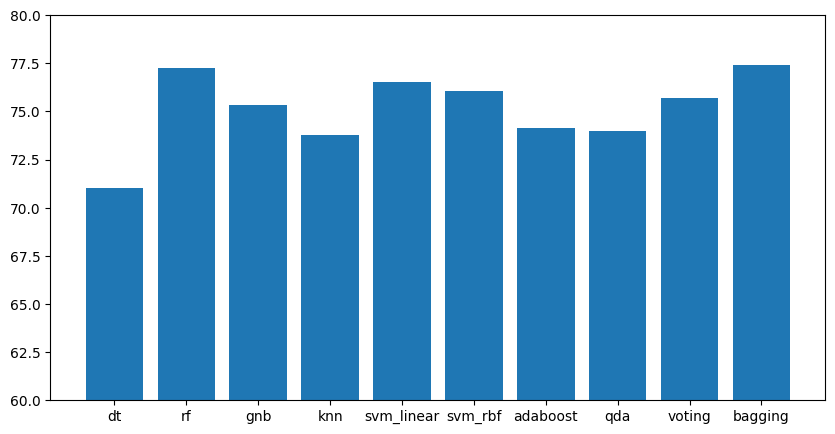

In [ ]:
# 각 분류기 별 정확도 평균값을 막대그래프로 출력

plt.figure(figsize=(10,5))
plt.ylim([60,80])
plt.bar(model_names, model_means)

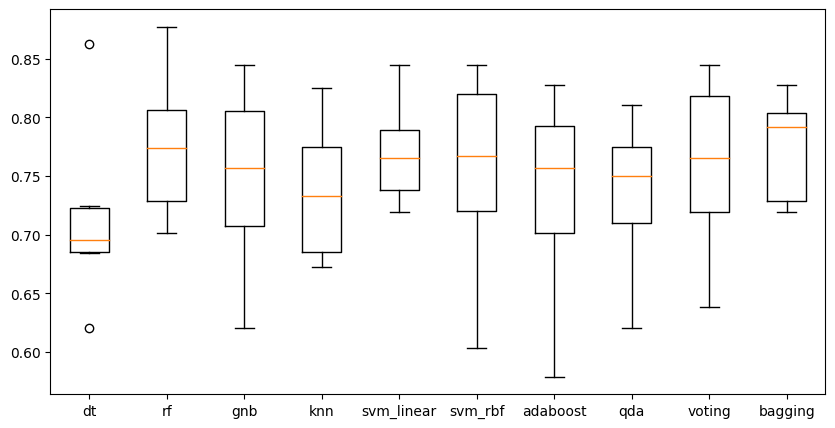

In [ ]:
# 각 분류기별 결과 box-plot 표현

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

ax.boxplot(model_accuracy)
ax.set_xticklabels(model_names)

plt.show()